In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api as sm
import statsmodels
import math
from datetime import datetime
from sklearn import linear_model
import matplotlib.cm as cm

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('turnstile_data_master_with_weather.csv')
print "Months in dataset: {}" . format(
            df['DATEn'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").month).unique())

df.head()

Months in dataset: [5]


,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0,0,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217,553,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890,1262,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451,3708,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400,2501,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0


In [3]:
df.describe()

,Unnamed: 0,Hour,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,minpressurei,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
count,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951
mean,65975.000000,10.896158,1095.348478,886.890838,30.031894,57.241302,48.259013,29.892714,52.703526,29.965077,0.167100,0.334245,5.543065,56.169775,64.269729,71.769968,0.172276,0
std,38091.117022,6.892084,2337.015421,2008.604886,0.125689,8.770891,11.305312,0.146384,9.943590,0.130461,0.373066,0.471728,1.982441,6.338875,6.568289,7.627218,0.429005,0
min,0.000000,0.000000,0.000000,0.000000,29.740000,39.000000,22.000000,29.540000,31.000000,29.640000,0.000000,0.000000,1.000000,46.000000,55.000000,58.000000,0.000000,0
25%,32987.500000,5.000000,39.000000,32.000000,29.960000,50.000000,38.000000,29.840000,45.000000,29.910000,0.000000,0.000000,5.000000,52.000000,60.000000,65.000000,0.000000,0
50%,65975.000000,12.000000,279.000000,232.000000,30.030000,57.000000,51.000000,29.910000,54.000000,29.960000,0.000000,0.000000,5.000000,54.000000,63.000000,71.000000,0.000000,0
75%,98962.500000,17.000000,1109.000000,847.000000,30.100000,64.000000,55.000000,29.970000,60.000000,30.050000,0.000000,1.000000,6.000000,60.000000,68.000000,78.000000,0.100000,0
max,131950.000000,23.000000,51839.000000,45249.000000,30.310000,70.000000,66.000000,30.230000,68.000000,30.270000,1.000000,1.000000,12.000000,70.000000,78.000000,86.000000,2.180000,0


## Section 1. Statistical Test

#### 1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

#### 1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

#### 1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

#### 1.4 What is the significance and interpretation of these results?

I used the two-tailed Mann-Whitney U-test to compare the number of turnstile entries on rainy days and non-rainy days. 

The test gives us the U-statistic and the p-value. Note that the p-value returned by scipy.stats.mannwhitneyu is one-tailed, and threfore we need to multiple the p-value by two. 

I set p-critical to 0.05.  

$H_0$: Ridership samples for rainy and non-rainy days come from the same population.

$H_A$: Rideship samples for rainy and non-rainy days come from different population and one of the samples have larger values than the other.

where R stands for rainy, and N stands for non-rainy days. 

The Mann-Whitney test is appropriate in this case because there is no assumption about the underlying distributions (see histogram). This is referred to as a non-parametric test, a statistical test that does not assume our data is drawn from any particular underlying probability distribution (such as a normal distribution).

In [4]:
with_rain = df[df.rain == 1]['ENTRIESn_hourly']
without_rain = df[df.rain == 0]['ENTRIESn_hourly']

print "Rain Samples: {}".format(with_rain.count())
print "Mean(Rain): {}".format(with_rain.mean())
#print "Sum(Rain): {}".format(with_rain.sum())
print "No Rain Samples: {}".format(without_rain.count())
print "Mean(No Rain): {}".format(without_rain.mean())
#print "Sum(No Rain): {}".format(without_rain.sum())

Rain Samples: 44104
Mean(Rain): 1105.44637675
No Rain Samples: 87847
Mean(No Rain): 1090.27878015


In [6]:
#check if data is normal using Shapiro-Wilk test

(W, p) = scipy.stats.shapiro(with_rain)
print "W = {} ; p-value = {}".format(W,p)

(W, p) = scipy.stats.shapiro(without_rain)
print "W = {} ; p-value = {}".format(W,p)

print "Data is not normal because p-value = 0.0 (for both rain and non-rain)"

W = 0.471591472626 ; p-value = 0.0
W = 0.476617872715 ; p-value = 0.0
Data is not normal because p-value = 0.0 (for both rain and non-rain)


In [7]:
(U, p) = scipy.stats.mannwhitneyu(with_rain, without_rain)
print "Mann-Whitney Test Statistic {}".format(U)
print "p-value {}".format(p)

#compute small and big U (as seen in the mannwhitneyu source)
x = np.asarray(with_rain)
y = np.asarray(without_rain)
n1 = len(x)
n2 = len(y)
ranked = scipy.stats.rankdata(np.concatenate((x, y)))
rankx = ranked[0:n1]  # get the x-ranks
u1 = n1*n2 + (n1*(n1+1))/2.0 - np.sum(rankx, axis=0)  # calc U for x
u2 = n1*n2 - u1  # remainder is U for y
bigu = max(u1, u2)
smallu = min(u1, u2)

print "U: ({},{})".format(smallu, bigu)

Mann-Whitney Test Statistic 1924409167.0
p-value 0.0249999127935
U: (1924409167.0,1949994921.0)


In [8]:
alpha = 0.05 #p-critical

if p*2 < alpha:
    print "Reject null"
else:
    print "Accept null"

Reject null


Sample's means ratio (~0.99) makes it difficult to draw any conclusions. From the absolute mean values, one can see that NYC subway's ridership is higher on rainy days than on non-rainy days. U-statistic U is close to the maximal value, which would indicates that H0 is true. 

However, p-value is rather low, meaning that two populations significantly differ from each other. Thus,with 95% confidence, we reject the null hypothesis: i.e., ridership differ on rainy and non-rainy days.

## Section 2: Linear Regression

#### 2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:
- OLS using Statsmodels or Scikit Learn
- Gradient descent using Scikit Learn
- Or something different?

I've chosen the OLS using Statsmodel.


#### 2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?

I've used the following features: rain, fog, Hour, meantempi.

The following feature are created by transforming data: precipi – The square root of the 'precipi' field in the turnstile_master dataset. 

Dummy variables are used to include categorical data as features in a linear model: UNIT; and  weekday, i.e.,  the day of the week as an integer between 0 and 6 (Monday = 0)

In [9]:
# Select Features
# 'fog' and 'meantempi' seems to strongly correlate with rain.
features = df[['rain', 'fog', 'Hour', 'meantempi']]

# prevent warning
features.is_copy = False 

#seems to strongly correlate with 'rain'
##features['precipi'] = df['precipi'] ** 0.5

# UNIT
dummy_units = pd.get_dummies(df['UNIT'], prefix='unit')
features = features.join(dummy_units)

# weekday 
dummy_units = pd.get_dummies(df['DATEn'].apply(lambda x: 
                                               datetime.strptime(x, "%Y-%m-%d").weekday()), 
                             prefix='weekday')
features = features.join(dummy_units)


#### 2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that the selected features will contribute to the predictive power of your model.

meantempi is used as a feature because temperature may impact decision making as to use the subway or not. 

Hour and weekday features were used because the ridership varies with time of day and day of week. 

fog is used as feature because it may have an impact on people deciding to use the subway. 

I also use units as feature to account for locality.

#### 2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?

In [10]:
# ridership values
values = df[['ENTRIESn_hourly']]
m = len(values)
    
features = sm.add_constant(features)
model = sm.OLS(values,features)
results = model.fit()

print "Rain variable coefficient: {}".format(results.params.rain)
print "Rain variable p-value: {}".format(results.pvalues['rain'])

print "R^2 = {}".format(results.rsquared)

#results.summary()

Rain variable coefficient: -86.3231967078
Rain variable p-value: 9.34596688609e-13
R^2 = 0.470409944704


#### 2.5 What is your model’s $R^2$ (coefficients of determination) value?

$R^2 = 0.470$

#### 2.6 What does this $R^2$ value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this $R^2$  value?

$R^2$ indicates how well data fit a statistical model. It ranges from 0.0 to 1.0, where 0.0 means that data doesn't fit at all and 1.0 means that data fits perfectly. This $R^2$ value is low entails that the fit of this linear regression model is not good. The categorical nature of data in the data set, such as UNIT, makes a linear model inappropriate.

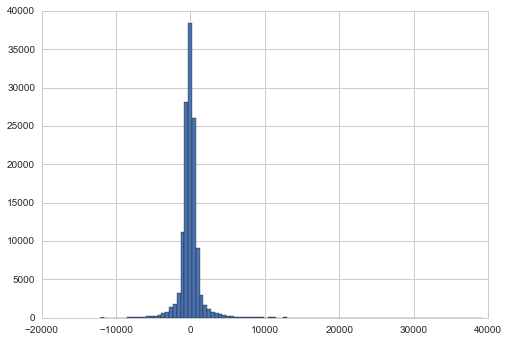

In [11]:
#graphical view of model prediction
#fig, ax = plt.subplots()
#
#x = xrange(0, len(values))
#y = values
#
#ax.plot(x, y, 'o', label="Data")
#ax.plot(x, results.predict(features), 'r', label="OLS prediction")
#ax.legend(loc="best");

y = values
predictions = results.predict(features)

#residuals
(y['ENTRIESn_hourly'] - predictions).hist(bins=100)

The long tails in the distribution of the residuals indicate that this is not a model. 

((array([-4.40648615, -4.21031205, -4.10370309, ...,  4.10370309,
          4.21031205,  4.40648615]),
  array([-12090.7103263 , -12046.24602267, -11998.34212781, ...,
          30787.2040309 ,  38723.6621204 ,  39152.3084937 ])),
 (1366.0045019038012, -1.4649796768491478e-10, 0.80317009995022259))

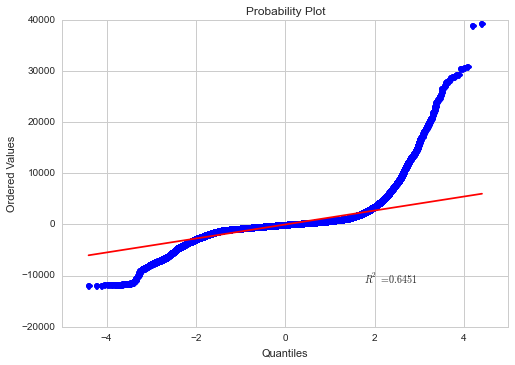

In [12]:
scipy.stats.probplot(y['ENTRIESn_hourly'] - predictions, plot=plt)

This Q-Q plot shows that the linear model is not adaquite for predicting ridership.

#### Using Gradient descent using Scikit Learn, is it any better?

Residual sum of squares: 2892419.12
R^2: 0.47


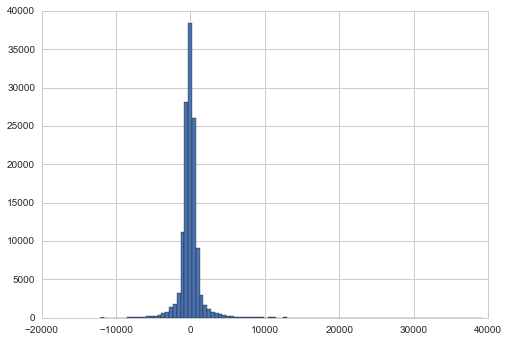

In [13]:
regr = linear_model.LinearRegression()
regr.fit(features, values)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(features) - values) ** 2))

# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % regr.score(features, values))

# Plot outputs
x = xrange(0, len(values))
y = values

y = values
predictions = results.predict(features)

#residuals
(y['ENTRIESn_hourly'] - predictions).hist(bins=100)

((array([-4.40648615, -4.21031205, -4.10370309, ...,  4.10370309,
          4.21031205,  4.40648615]),
  array([-12090.7103263 , -12046.24602267, -11998.34212781, ...,
          30787.2040309 ,  38723.6621204 ,  39152.3084937 ])),
 (1366.0045019038012, -1.4649796768491478e-10, 0.80317009995022259))

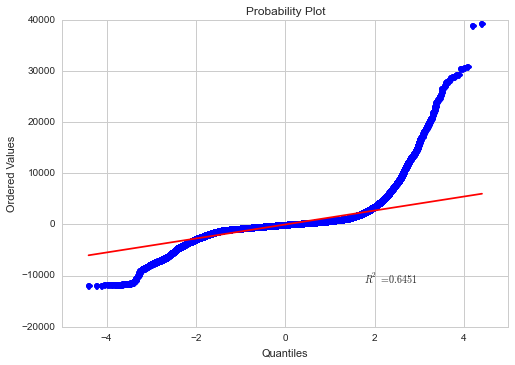

In [14]:
scipy.stats.probplot(y['ENTRIESn_hourly'] - predictions, plot=plt)

Again $R^2$ is rather low, so this model is not adequate. We can also see from the plot that the model does not properly predict the hourly entries. Same conclusion as for the OLS.

## Section 3. Visualization

**Please include two visualizations that show the relationships between two or more variables in the NYC subway data.
Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure.**

**3.1 One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.**

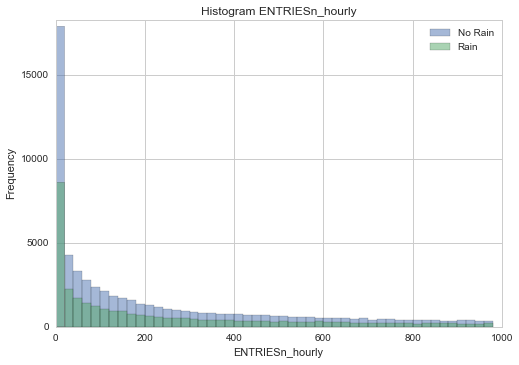

In [15]:
plt.figure()

nbins = 50
start_bin = min(df['ENTRIESn_hourly'])
stop_bin = 1000 #max(df['ENTRIESn_hourly'])
bin_width = (stop_bin - start_bin)/nbins

bin_list = np.arange(start_bin, stop_bin, bin_width)

without_rain.hist(label='No Rain', bins = bin_list, alpha = 0.5)
with_rain.hist(label='Rain', bins = bin_list, alpha = 0.5)

plt.ylim(ymax = 18300, ymin = 0)

plt.title('Histogram ENTRIESn_hourly')
plt.xlabel('ENTRIESn_hourly')
plt.ylabel('Frequency')
plt.legend()

The ENTRIESn_hourly's seems to **not** be normally distributed (as confirmed by the Shapiro-Wilk test) and skewed to the right on both rainy and non-rainy days.

**3.2 One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like.**

In [17]:
import pandasql

df_stats = df[['DATEn', 'ENTRIESn_hourly', 'rain', 'meantempi']]
df_stats.is_copy = False 
df_stats['weekday'] = df['DATEn'].apply(lambda x: 
                                        datetime.strptime(x, "%Y-%m-%d").strftime('%w'))
    
total_weekday = """
    select weekday, sum(ENTRIESn_hourly) as weekdayentries, count(*)
    from df_stats
    group by weekday
    """

qrainy = """
    select weekday, sum(ENTRIESn_hourly) as weekdayentries, count(*)
    from df_stats
    where rain = 1
    group by weekday
    """

qnonrainy = """
    select weekday, sum(ENTRIESn_hourly) as weekdayentries, count(*)
    from df_stats
    where rain = 0
    group by weekday
    """

total_perday = """
    select DATEn, sum(ENTRIESn_hourly) as weekdayentries, avg(meantempi) as temp
    from df_stats
    group by DATEn
    """

#Execute SQL command against the pandas frame
total_weekdays = pandasql.sqldf(total_weekday.lower(), locals())
rainy_weekdays = pandasql.sqldf(qrainy.lower(), locals())
norainy_weekdays = pandasql.sqldf(qnonrainy.lower(), locals())
total_perday_res = pandasql.sqldf(total_perday.lower(), locals())

#ridership_temp = pandasql.sqldf(ridership_per_temp.lower(), locals())

#print total_weekdays
#print rainy_weekdays
#print norainy_weekdays
print total_perday_res

         DATEn  weekdayentries  temp
0   2011-05-01         2370432    60
1   2011-05-02         5317143    57
2   2011-05-03         5840327    65
3   2011-05-04         5836427    55
4   2011-05-05         5900352    56
5   2011-05-06         5862195    61
6   2011-05-07         3530107    64
7   2011-05-08         2683954    63
8   2011-05-09         5346657    63
9   2011-05-10         5767646    64
10  2011-05-11         5894916    62
11  2011-05-12         5907349    63
12  2011-05-13         5863115    60
13  2011-05-14         3537323    61
14  2011-05-15         2685406    64
15  2011-05-16         5428740    58
16  2011-05-17         5669840    56
17  2011-05-18         5866031    61
18  2011-05-19         5811475    68
19  2011-05-20         5792009    61
20  2011-05-21         3627123    67
21  2011-05-22         2717714    56
22  2011-05-23         5376031    61
23  2011-05-24         5720141    74
24  2011-05-25         5965262    75
25  2011-05-26         5867473    71
2

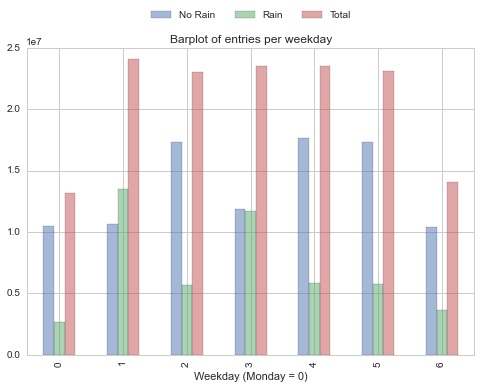

In [18]:
plt.figure()

merged = total_weekdays
merged['Total'] = total_weekdays['weekdayentries']
merged['Rain'] = rainy_weekdays['weekdayentries']
merged['No Rain'] = norainy_weekdays['weekdayentries']

merged = merged[['No Rain', 'Rain', 'Total']]

merged.plot(kind='bar', alpha = 0.5)

plt.title('Barplot of entries per weekday')
plt.xlabel('Weekday (Monday = 0)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=True)

The barplot show the entries per weekday for both rainy and non rainy days, as well as the total entries. It seems to show that more people ride the subway when it is not raining, which is does not fit the fact that the average entries during rainy days is higher (suggesting ridership otherwise).

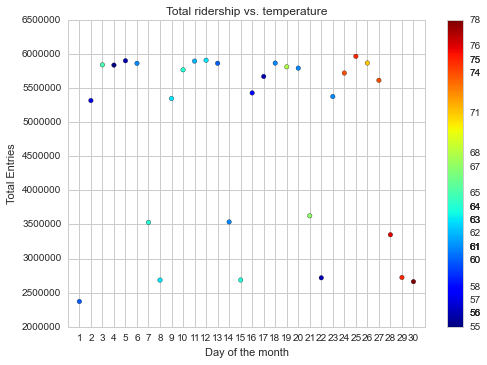

<Container object of 17 artists>

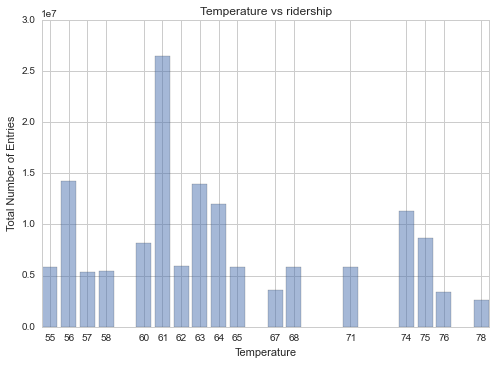

In [19]:

y = total_perday_res['weekdayentries']
x = total_perday_res.index + 1
t = total_perday_res['temp']

plt.scatter(x, y, c=t, cmap='jet')

cb=plt.colorbar(ticks=np.array(t))

plt.title('Total ridership vs. temperature')
plt.xlabel('Day of the month')
plt.ylabel('Total Entries')
plt.xlim(0, 31)
plt.xticks(x)

plt.show()


dtmp = np.sort(t.unique())
data = np.zeros(len(dtmp))

i = 0
for key, grp in total_perday_res.groupby(['temp']):
    #print key, grp['weekdayentries'].sum() 
    data[i] = grp['weekdayentries'].sum() 
    i = i+1

plt.title('Temperature vs ridership ')
plt.xlabel('Temperature')
plt.ylabel('Total Number of Entries')
plt.xticks(dtmp)
plt.bar(dtmp, data, alpha = 0.5, align='center')

The plot shows ridership vs. mean temperature (in F). This plot suggests that there is no "correlation" between mean temperature and ridership. No correlation in the sense that temperature does not seem to have a positive/negative impact on ridership (see the link below for what plots show -- correlation is not shown in barplots, and I am misusing the word). 

(Different types of plots: https://blog.udemy.com/different-kinds-of-graphs/)

## Section 4. Conclusion

**4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?**

Given that (i) the mean shows that there is more ridership when it is raining and the Mann-Whitney U test confirms that this difference is significant, I conclude that there is more ridership when it is raining. 

Given that there are features that may strongly correlate with rain (see next answer), hence the potential reason for the negative coeff fo the rain variable, I am not using this test to draw any conclusions.  

**4.2 What analyses lead you to this conclusion? You should use results from both your statistical tests and your linear regression to support your analysis.**

I've drawn the conclusion after using the Mann-Whitney U test to test whether or not there is significant difference in ridership distribution on rainy and non-rainy days. The Mann-Whitney U test was chosen after confirming that the data does not follow a normal distribution using the Shapiro-Wilk test. The results of the U-test rejects the null hypothesis: i.e., if we randomly take a day from the rain sample and the no-rain sample, one is more likely to show a higher ridership.

The regression test I used (OLS), using only features available in the dataset, is not good for predictions (low $R^2$). The negative coeff ($\theta$ = -86.3232) of the rain variable indicates that there is a negative relation between rain and ridership. Given this negative coefficient, linear regression suggests the opposite of the statistical test. This might, however, be an effect of multicollinearity. Preliminary investigation for strongly correlated features indicates that fog, meantempi and dummy weekday features strongly correlate with rain. Removing them from the model, increases the rain variable coefficient to $17.6455$, but yields an $R^2$ of 0.458. Hence, prediction is far from being accurate.   

Hence, more investigation is needed to engineer a better model and features, to be able to predict ridership. 

## Section 5. Reflection

**5.1 Please discuss potential shortcomings of the methods of your analysis, including:
Dataset, Analysis, such as the linear regression model or statistical test. **

The dataset is just one month of data (may), and therefore entails low variability of several features (raining, fog) that may lead to use of the subway. 

Categorical data requires to check whether the data is linearly separable or not. Also seasonality, which seems to be a property of this data, requires other models such as ARIMA/ARMA. 

**5.2 (Optional) Do you have any other insight about the dataset that you would like to share with us?**

Contrary to all other weekdays, the ridership on non rainy Tuesdays is not higher than on rainy Tuesdays. This is the only day of the week where this happened - it does not follow our statistical analysis. 